# Devoir 1 - Compréhension et préparation des données d'apprentissage

## Récupérer les données

Pour la récupération des données, nous allons utiliser la fonction **read_csv()** de la librairie *Pandas*. Dans notre cas, trois dataset sont à récupérer : customer (étant le dataset principal ayant les informations sur chaque client du site), countryPopulation (le nombre d'habitant par pays) et coutryPIB (le PIB par pays)

In [655]:
#Importation des librairies (pandas, numpy)
import pandas as pd 
import numpy as np

#Chargement des données: 

#Customer.csv
customers = pd.read_csv("Customer.csv") 

#CountryPopulation.csv
country_population = pd.read_csv("CountryPopulation.csv")

#CountryGDP.csv
country_PIB = pd.read_csv("CountryGDP.csv")

## Examinater les structures des données

Cette partie permet d'avoir une meilleure compréhension des données. Pour cela, nous allons utiliser plusieurs fonctions sur nos *DataFrames* : 
   - **head()**
   - **info()**
   - **value_counts()**
   - **describe()**

Puis nous transformerons certaines données en histogramme afin d'avoir des informations supplémentaires sur les données.

### Fonction head()

La fonction **head()**, nous permet d'avoir les 5 premières lignes de notre Dataframe. Nous connaissons maintenant les différentes colonnes de notre Dataframe 'customers'. Le Dataframe possède 8 informations (colonnes) :
   - age (âge du client)
   - pages (le nombre de pages du site visité)
   - first_item_prize (le prix du premier article acheté)
   - gender (masculin ou féminin)
   - ReBuy (le client a-t-il acheté le premier article plus d’une fois?)
   - News_click (nombre de fois où le client a cliqué sur une compagne de publicité du site)
   - country (le pays dont provient l’adresse IP)
   - revenue (revenu généré par le client sur le site)
   
Pour l'instant **head()** nous permet pas d'avoir des informations plus précise. 

Nous faison donc de même pour les deux autres dataframes.

In [656]:
#les 5 premières lignes du Dataframe customers
customers.head()

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
0,41.0,6.0,28.0,Fem,False,4.0,China,113
1,34.0,4.0,15.5,Fem,True,2.0,China,36
2,38.0,5.0,?,Fem,False,7.0,China,111
3,20.0,1.0,44.0,Fem,False,2.0,China,71
4,39.0,10.0,10.0,Fem,True,4.0,China,80


In [657]:
#les 5 premières lignes du Dataframe countryPopulation
country_population.head()

,Country,population
0,China,1360720000
1,India,1241100000
2,United States,317638000
3,Indonesia,249866000
4,Brazil,201032714


In [658]:
#les 5 premières lignes du Dataframe countryPIB
country_PIB.head()

,Country,GDP_inhab
0,Qatar,100889
1,Luxembourg,77958
2,Singapore,60799
3,Norway,54397
4,Brunei,54114


### Fonction info()

La fonction **info()** permet d'obtenir une description des données, en particulier le nombre total de ligne, le type de chaque variable et le nombre de valeurs.

Pour la Dataframe 'customers', nous obtenons 10 000 lignes. Parmis les colonnes, nous avons :
   - age en **float64**
   - pages en **float64**
   - first_item_prize en **object**
   - gender en **object**
   - ReBuy en **bool**
   - News_click en **float64**
   - country en **object**
   - revenue en **object**
   
Grâce aux informations, nous pouvons déjà faire quelques supposition sur le nettoyage de notre dataframe. Grâce à la fonction **head()**, nous observons que *first_item_prize* et *revenue* sont des nombres. Cependant, ils sont considérés comme des **object**. Il faudra donc les transformer en float64. De plus, nous observons un '*?*' dans *first_item_prize*. Il est donc possible que des chaînes de caractère soient dans nos colonnes de type **object** censées être de type **float64**. Il faudra les supprimer ou les modifier, cela dépend de la pertinence de l'information.


In [659]:
#description des données de customers
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  10000 non-null  object 
 3   gender            10000 non-null  object 
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  object 
 7   revenue           10000 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 556.8+ KB


Pour les deux autres dataframes, nous avons chaque pays, 'Country' de type **object**, associé à une valeur de type **int64**

In [660]:
#description des données de countryPopulation
country_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     220 non-null    object
 1   population  220 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ KB


In [661]:
#description des données de countryPIB
country_PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    188 non-null    object
 1   GDP_inhab  188 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


### Fonction value_counts()

La fonction **value_counts** permet d'avoir l'effectif de chaque valeur de chaque colonne.

Pour nos 3 dataframes, nous n'obtenons aucune information supplémentaire pour le nettoyage des données des datasets.

In [662]:
#effectif de chaque valeur de chaque colonne
for colonne in customers.columns.tolist():
    print(customers[colonne].value_counts())

35.0    462
36.0    461
38.0    454
34.0    447
37.0    441
       ... 
63.0     10
62.0     10
71.0      9
75.0      9
70.0      6
Name: age, Length: 62, dtype: int64
5.0     2110
6.0     1885
7.0     1405
4.0     1130
3.0      870
8.0      685
9.0      625
2.0      350
10.0     290
13.0     170
1.0      145
12.0     140
11.0     115
14.0      80
Name: pages, dtype: int64
44.0     2083
22.0     1750
15.5     1462
42.0      941
28.0      845
57.0      825
10.0      755
102.0     670
117.0     342
78.0      324
?           3
Name: first_item_prize, dtype: int64
Fem     6902
Masc    3098
Name: gender, dtype: int64
False    7200
True     2800
Name: ReBuy, dtype: int64
4.0     1925
3.0     1510
5.0     1410
6.0     1140
2.0     1020
7.0      785
1.0      735
0.0      405
10.0     400
9.0      370
8.0      300
Name: News_click, dtype: int64
China             200
Morocco           200
Ukraine           200
Tanzania          200
Kenya             200
Argentina         200
Algeria           20

In [663]:
#effectif de chaque valeur de chaque colonne
for colonne in country_population.columns.tolist():
    print(country_population[colonne].value_counts())

China         1
Gabon         1
Jamaica       1
Namibia       1
Lesotho       1
             ..
Tunisia       1
Guinea        1
Greece        1
Rwanda        1
San Marino    1
Name: Country, Length: 220, dtype: int64
1360720000    1
1672000       1
2711476       1
2113077       1
2074000       1
             ..
10886500      1
10824200      1
10815197      1
10537222      1
33540         1
Name: population, Length: 220, dtype: int64


In [664]:
#effectif de chaque valeur de chaque colonne
for colonne in country_PIB.columns.tolist():
    print(country_PIB[colonne].value_counts())

Qatar              1
Congo Rep.         1
Swaziland          1
Mongolia           1
Morocco            1
                  ..
Belarus            1
Panama             1
Mauritius          1
Mexico             1
Congo Dem. Rep.    1
Name: Country, Length: 188, dtype: int64
100889    1
4616      1
5719      1
5314      1
5193      1
         ..
15479     1
15449     1
15424     1
15363     1
365       1
Name: GDP_inhab, Length: 188, dtype: int64


### Fonction describe()

La fonction **describe()** permet d'avoir un récapitulatif des variables numériques. Elle permet d'avoir les informations suivantes sur chaque colonne numérique : le nombre de valeur, la moyenne, le minimum, le maximum, ...

Pour notre dataframe 'customers', il nous manque *first_item_prize* et *revenue* qui sont pour l'instant toujours de type **object**.

De plus, ici la fonction **describe()** ne nous donne pas plus d'information sur des données potentiellement abérante. Pour cela, nous réaliserons juste après des histogrammes.


In [665]:
#récapitulatif des variables numériques
customers.describe()

,age,pages,News_click
count,10000.000000,10000.000000,10000.000000
mean,37.431400,5.995000,4.412000
std,9.490474,2.438559,2.418231
min,18.000000,1.000000,0.000000
25%,31.000000,5.000000,3.000000
50%,37.000000,6.000000,4.000000
75%,43.000000,7.000000,6.000000
max,79.000000,14.000000,10.000000


Pour nos deux autres dataframes, aucune observation n'est à soulever.

In [666]:
#récapitulatif des variables numériques
country_population.describe()

,population
count,2.200000e+02
mean,3.221967e+07
std,1.286942e+08
min,3.354000e+04
25%,7.445270e+05
50%,6.130662e+06
75%,2.077282e+07
max,1.360720e+09


In [667]:
#récapitulatif des variables numériques
country_PIB.describe()

,GDP_inhab
count,188.000000
mean,14869.468085
std,15813.394806
min,365.000000
25%,3003.750000
50%,8985.500000
75%,21465.750000
max,100889.000000


### Les histogrammes

Afin d'avoir plus d'information sur des données abérante sur nos trois colonne de type **float64**, nous élaborons des histogrammes. Pour cela, nous importons la librairie *pyplot* de Matplotlib afin d'utiliser les fonctions **hist()** et **show()**.

Pour notre dataframe 'customers', nous observons des courbes normales avec un ettalement vers la droite sur certains histogramme qui pourrait s'apparenter à du bruit donc des valeurs abérante. Nous les analyserons dans la suite du devoir.

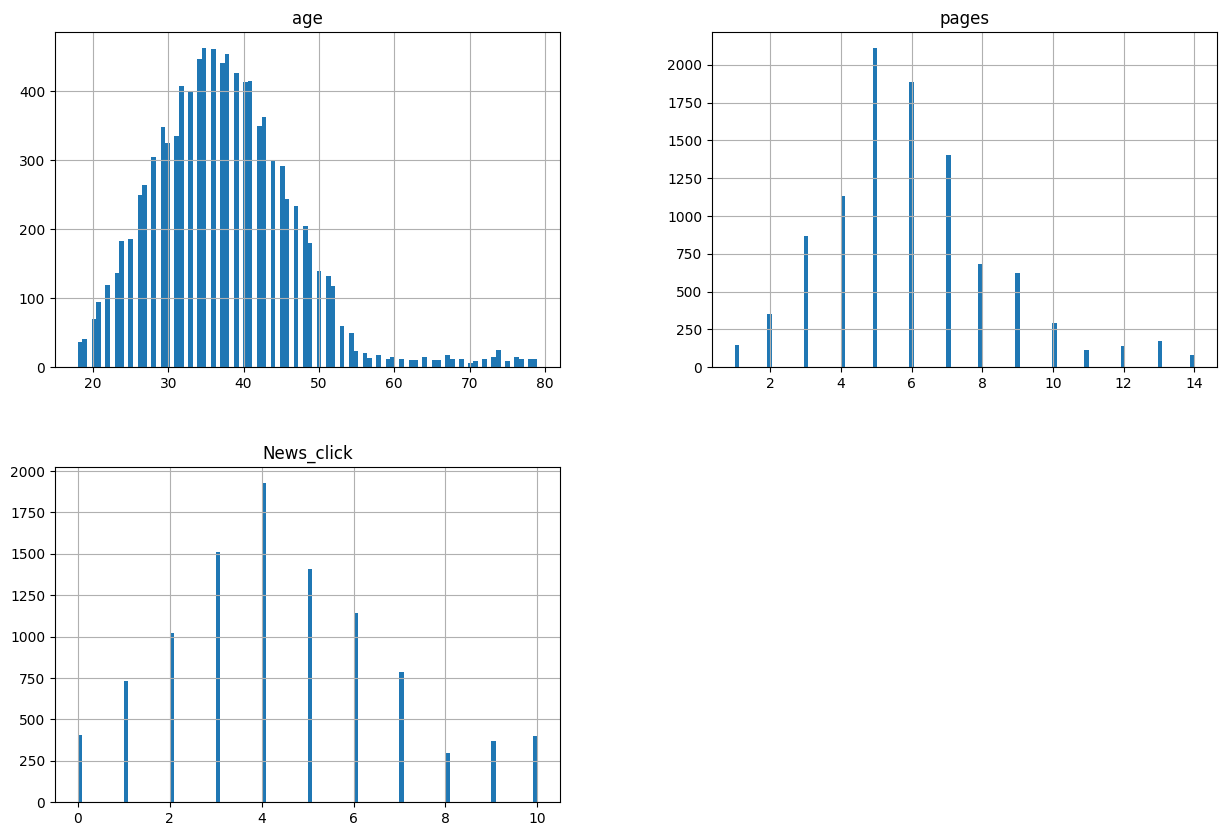

In [668]:
#création d'histogramme sur la dataframe customers
%matplotlib inline
import matplotlib.pyplot as plt

customers.hist(bins=100, figsize=(15,10))
plt.show()

Pour nos deux autres dataframes, on peut considérer qu'aucune valeur n'est abérante car ce sont des données générales sur le nombre de population et le PIB. Il est donc normale d'avoir des valeurs avec une disparité.

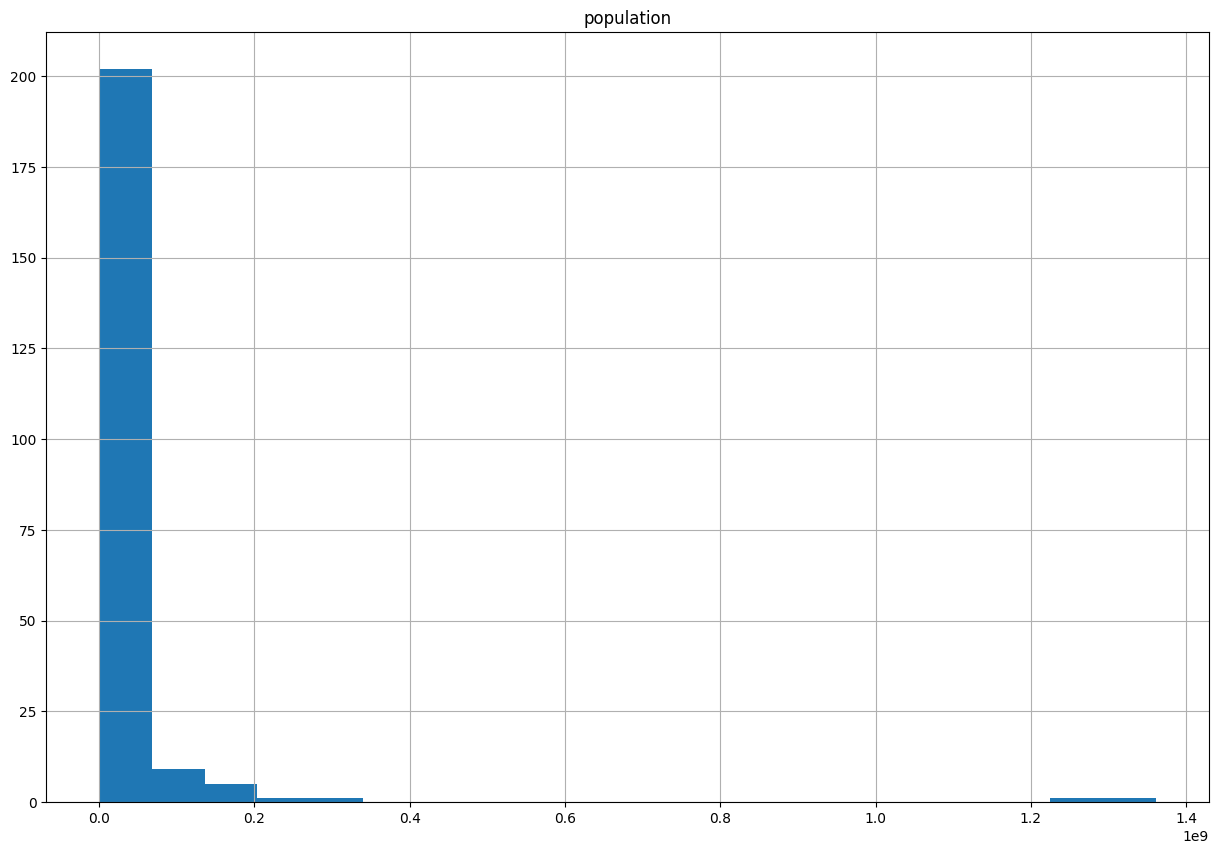

In [669]:
#création d'histogramme sur la dataframe countryPopulation
country_population.hist(bins=20, figsize=(15,10))
plt.show()

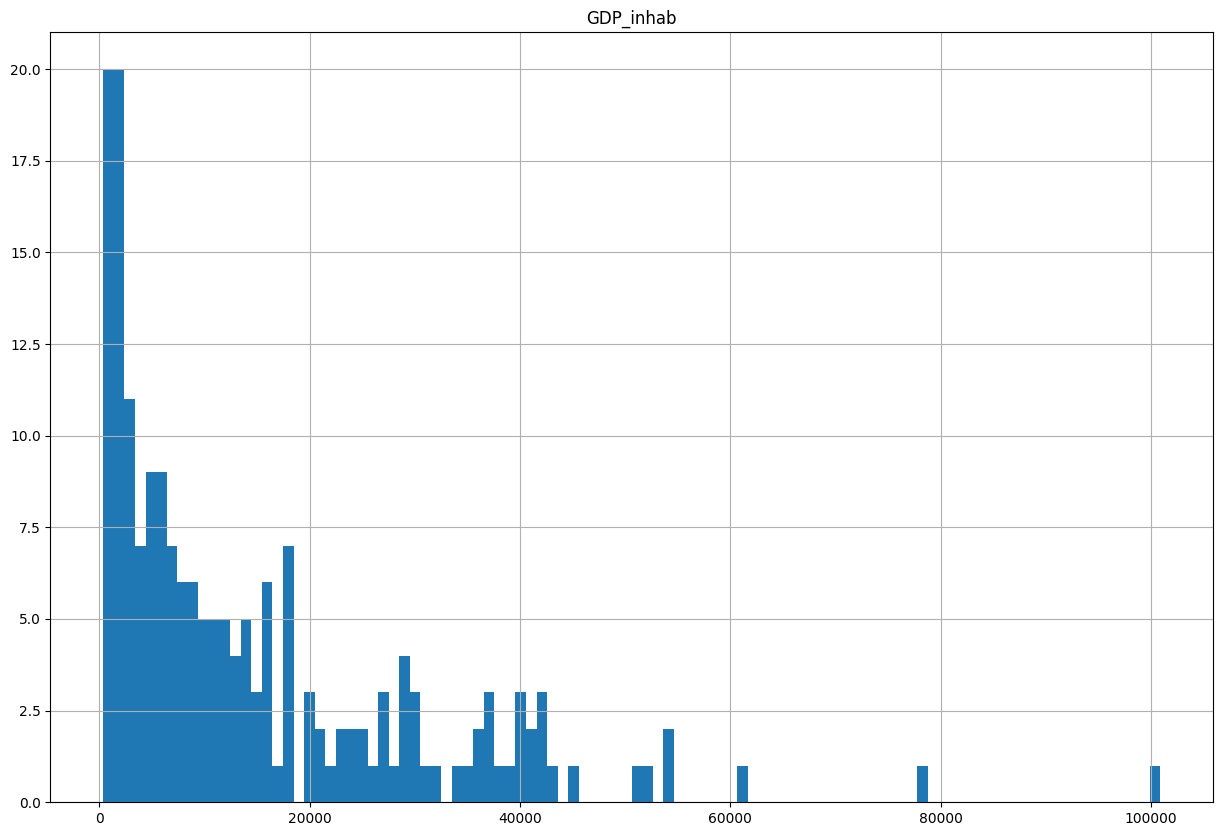

In [670]:
#création d'histogramme sur la dataframe countryPIB
country_PIB.hist(bins=100, figsize=(15,10))
plt.show()

## Créer un jeu de test

Avant tout type de manipulation sur nos dataframe, il est important de séparer nos données en un jeu d'entraîment et un jeu de test. Nous travaillerons sur le jeu de d'entraînement qui correspond à 80% du dataset. Et notre jeu de test représentera 20%.

Afin de séparer notre dataframe, nous utilisons la fonction **train_test_split()** de la librairie Scikit-learn.

In [671]:
from sklearn.model_selection import train_test_split

#séparation de notre dataframe en deux partie (80/20)
train_set, test_set = train_test_split(customers, test_size = 0.2, random_state = 42)

## Nettoyer nos données d'entraînement

### Convertir les données nécessaires

Dans un premier temps, il est important de travailler sur une copie des données d'entraînement. De plus, on crée une dataframe ayant seulement les colonnes de type **float64** et les colonnes de type **object** qui devraient être de type **float64**. Cette petite partie permet de faire la pipeline à la fin du devoir.

Nous allons aussi utiliser des transformers pour pouvoir créer une pipeline.

#### Fonction drop()

L'utilisation de la fonction **drop()** nous permet de retourner le dataframe sans la colonne sans modifier le dataframe en paramètre.

In [672]:
#création d'une copie de notre jeu d'entraînement
customers = train_set.copy()

def only_numeric(data):
    #dataframe customers avec seulement les colonnes numériques
    customers_num = []
    #liste des colonnes a drop
    colonnes = []
    #liste des colonnes où il faut convertir les données
    colonne_change = ["first_item_prize", "revenue"]

    #implémentation des colonnes a drop
    for colonne in data.columns.tolist():
        if (data[colonne].dtype != 'float64') & (colonne not in colonne_change):
            colonnes.append(colonne)

    #retourne le dataframe customers avec seulement les colonnes numériques
    return data.drop(colonnes, axis=1)

customers_num = only_numeric(customers)
#vérification de notre nouveau dataframe
customers_num.describe(include ='all')

,age,pages,first_item_prize,News_click,revenue
count,8000.000000,8000.000000,8000,8000.000000,8000
unique,NaN,NaN,11,NaN,454
top,NaN,NaN,44.0,NaN,68
freq,NaN,NaN,1637,NaN,72
mean,37.391750,6.009500,NaN,4.403625,NaN
std,9.480534,2.439806,NaN,2.427179,NaN
min,18.000000,1.000000,NaN,0.000000,NaN
25%,31.000000,5.000000,NaN,3.000000,NaN
50%,37.000000,6.000000,NaN,4.000000,NaN
75%,43.000000,7.000000,NaN,6.000000,NaN


#### Fonction to_numeric()

Le but de cette partie est de convertir les valeurs de type **object** censées être de type **float64** en type **float64**. Pour cela, nous utiliserons la fonction **to_numeric()** de la librairie *Pandas*. Pour chaque valeur de chaque colonne de *colonne_change*, on convertit les valeurs en **float64** et si la valeur est inconvertible (*unknown*, *?*, dans notre cas) alors la valeur est remplacer par null (NaN).

In [673]:
from sklearn.preprocessing import FunctionTransformer


#fonction permettant de convertir une colonne en float64
def data_to_numeric(X, convert_value = True):
    if convert_value:
        #liste des colonnes où il faut convertir les données
        colonne_change = ["first_item_prize", "revenue"]
        #remplacer les anciennes valeurs des colonnes par les nouvelles
        for colonne in colonne_change:
            #nouvelle colonne avec les nouvelles valeur en float64
            new_colonne = []
            for valeur in X[colonne]:
                #ajoute la nouvelle valeur en float64 dans la nouvelle colonne
                new_colonne.append(pd.to_numeric(valeur, errors = 'coerce'))
            X[colonne] = new_colonne
        #parcours toutes les valeurs de la colonne
        return X
    else:
        return X

convert_values = FunctionTransformer(data_to_numeric, validate = False)

customers_num_tr = convert_values.fit_transform(customers_num)
#s'assurer que les colonnes ont été convertis et que les valeurs manquantes sont des null
customers_num_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8000 non-null   float64
 1   pages             8000 non-null   float64
 2   first_item_prize  7997 non-null   float64
 3   News_click        8000 non-null   float64
 4   revenue           7997 non-null   float64
dtypes: float64(5)
memory usage: 375.0 KB


Nous observons bien que les colonnes *first_item_prize* et *revenue* sont maintenant de type **float64** et que seulement 7997 valeurs sont non_null. Maintenant, le but est de traiter ces valeurs null.

### Traiter les valeurs *null*

Après avoir convertit certaines colonnes, nous avons observer que certaines valeurs étaient *null*. Il va donc falloir les traiter afin d'avoir un ensemble de données cohérentes. Nous avons déjà isoler les colonnes numériques pour pouvoir utiliser la fonction **SimpleImputer()**.

#### Fonction SimpleImputer()

La fonction **SimpleImputer()** permet d'échanger les valeurs *null* d'un dataset en une valeur défini (ici la médian de chaque colonne). Nous choisisons d'échanger les valeurs null par la médian et non de les supprimer. Il pourrait avoir plus de donnée *null* dans d'autre dataset et donc on pourrait avoir un manque de donnée. Ici ce n'est pas le cas, mais nous décidons quand même de choisir la median afin de garder toutes les données.

In [674]:
from sklearn.impute import SimpleImputer

def remplacer_valeur_null(data):
    #création de notre SimpleImputer allant remplacer les valeurs NaN par la médian
    imputer = SimpleImputer(strategy = "median")
    #entraîner l'imputer sur notre jeu de données
    imputer.fit(data)
    #création de notre dataframe transformé
    X = imputer.transform(data)
    
    return pd.DataFrame(X, columns = data.columns)

customers_num_tr = remplacer_valeur_null(customers_num_tr)

#vérification si notre nouveau dataframe n'a pas de valeur null
customers_num_tr.describe(include = 'all')

,age,pages,first_item_prize,News_click,revenue
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,37.391750,6.009500,40.285688,4.403625,122.716750
std,9.480534,2.439806,27.620343,2.427179,86.429223
min,18.000000,1.000000,10.000000,0.000000,3.000000
25%,31.000000,5.000000,22.000000,3.000000,60.000000
50%,37.000000,6.000000,42.000000,4.000000,100.000000
75%,43.000000,7.000000,44.000000,6.000000,164.000000
max,79.000000,14.000000,117.000000,10.000000,995.000000


Nous observons qu'aucune valeur est null. Le programme fonctionne correctement.

### Traiter les données aberrantes

#### La méthode "*boîte à moustaches*"

La méthode "*boîte à moustaches*" permet de visualier facilement les données aberrante, on peut appeler ça 'le bruit'. Nous avons pu l'observer sur certaines colonnes lors de l'implémentation des histogrammes. Cette méthode est basé sur la technique de "bornage ou amplitude interquantiles" permettant d'avoir une borne inférieur et supérieur.

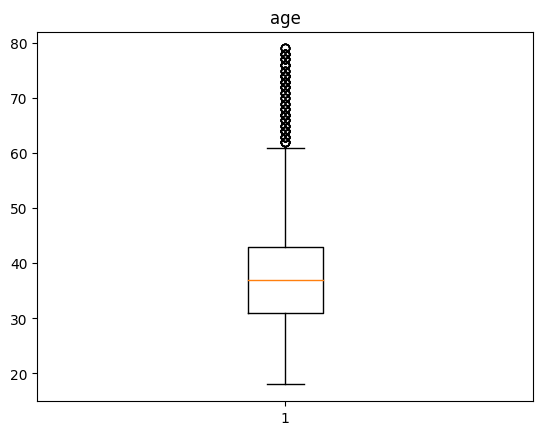

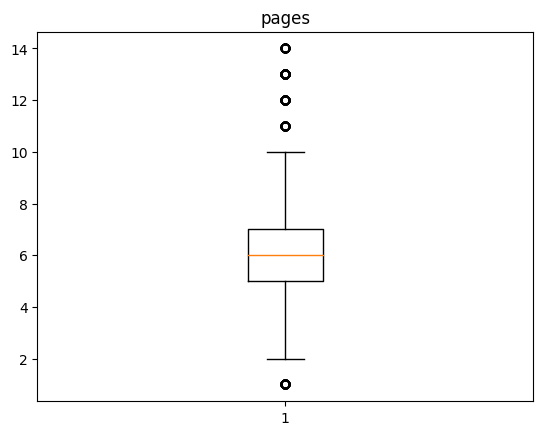

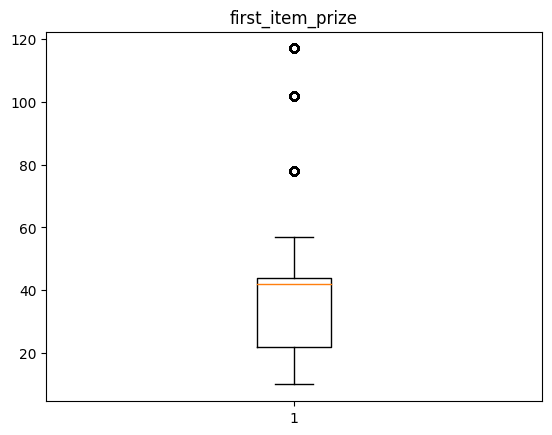

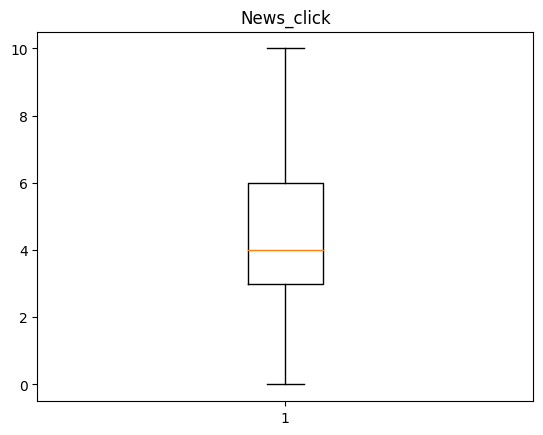

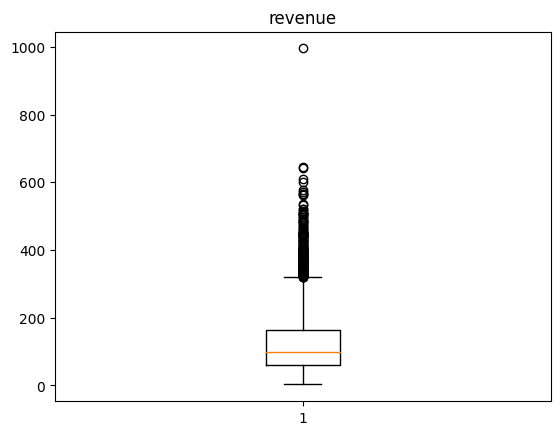

In [675]:
#retourner les boîtes à moustaches pour chaque colonne
def boite_moustache(data):
    for colonne in data.columns.tolist():
        plt.boxplot(data[colonne])
        plt.title(colonne)
        plt.show()
        
boite_moustache(customers_num_tr)

Après avoir observer le bruit sur chaque colonne, nous voulons connaître les bornes inférieur et supérieur. Pour cela, nous utiliserons la technique de l'amplitude interquantile utilisant les premiers et troisièmes quartiles. 

On définit cette fonction **ampl_interquantile(Q1, Q3)** :

In [676]:
def ampl_interquartiles(Q1, Q3):
    borne_inf = Q1 - 1.5*(Q3-Q1)
    borne_sup = Q3 + 1.5*(Q3-Q1)
    return borne_inf, borne_sup

Après avoir calculé les bornes inférieur et supérieur, nous créons une simple fonction **val_aberrante(borne_inf, borne_sup, val)** retournant **True** si la valeur est à l'extérieur des bornes et sinon **False** si la valeur est à l'intérieur des bornes.

In [677]:
def val_aberrante(borne_inf, borne_sup, val):
    if((val < borne_inf) | (val > borne_sup)):
        return True
    else:
        return False  

Après avoir créer les fonctions nécessaires, nous calculons les bornes inférieur et supérieur de chaque colonne pour après modifier les valeurs abérrantes en NaN. Nous utilisons encore une fois un transformer pour la pipeline.

In [678]:
def remove_noise(X, remove_all_noises = True):
    if remove_all_noises:
        #pour toutes les colonnes
        for colonne in X.columns.tolist():
            #calcule des bornes inf et sup
            borne_inf, borne_sup = ampl_interquartiles(X[colonne].quantile(0.25),X[colonne].quantile(0.75))
            #pour toute les valeurs vérifier si elles sont aberrantes
            for index_valeur in range(np.size(X[colonne])):
                #si aberrante 
                if(val_aberrante(borne_inf, borne_sup, X[colonne][index_valeur])):
                    X[colonne][index_valeur] = np.nan
        return X
    else :
        return X

noises = FunctionTransformer(remove_noise, validate = False)
customers_num_tr = noises.fit_transform(customers_num_tr)
customers_num_tr.describe(include = 'all')

,age,pages,first_item_prize,News_click,revenue
count,7827.000000,7482.000000,6931.000000,8000.000000,7731.000000
mean,36.662962,5.738573,31.070625,4.403625,113.453887
std,8.167435,1.907802,14.654123,2.427179,70.609452
min,18.000000,2.000000,10.000000,0.000000,3.000000
25%,31.000000,5.000000,15.500000,3.000000,58.000000
50%,37.000000,6.000000,28.000000,4.000000,97.000000
75%,42.000000,7.000000,44.000000,6.000000,154.000000
max,61.000000,10.000000,57.000000,10.000000,320.000000


Enfin, nous utilisons la fonctions **remplacer_valeur_null(data)** pour avoir des données complète.

In [679]:
customers_num_tr = remplacer_valeur_null(customers_num_tr)

customers_num_tr.describe(include = 'all')

,age,pages,first_item_prize,News_click,revenue
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,36.670250,5.755500,30.660312,4.403625,112.900625
std,8.078779,1.846116,13.679779,2.427179,69.475378
min,18.000000,2.000000,10.000000,0.000000,3.000000
25%,31.000000,5.000000,22.000000,3.000000,60.000000
50%,37.000000,6.000000,28.000000,4.000000,97.000000
75%,42.000000,7.000000,44.000000,6.000000,151.000000
max,61.000000,10.000000,57.000000,10.000000,320.000000


Après avoir remplacer les valeurs *null*, nous mettons à jour notre dataframe 'customers'

In [680]:
for colonne1 in customers.columns.tolist():
    #pour toutes les colonnes de 'customers_tr'
    for colonne2 in customers_tr.columns.tolist():
        #si les colonnes ont le même label
        if(colonne1 == colonne2):
            #alors on copie la colonne 2 dans la colonne 1
            customers[colonne1] = customers_tr[colonne1].values
            
#vérification si les données sont correctes
customers.describe(include = 'all')

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
count,8000.000000,8000.000000,8000.000000,8000,8000,8000.000000,8000,8000.000000
unique,NaN,NaN,NaN,2,2,NaN,50,NaN
top,NaN,NaN,NaN,Fem,False,NaN,Ghana,NaN
freq,NaN,NaN,NaN,5532,5769,NaN,176,NaN
mean,36.670250,5.755500,30.660312,NaN,NaN,4.403625,NaN,112.900625
std,8.078779,1.846116,13.679779,NaN,NaN,2.427179,NaN,69.475378
min,18.000000,2.000000,10.000000,NaN,NaN,0.000000,NaN,3.000000
25%,31.000000,5.000000,22.000000,NaN,NaN,3.000000,NaN,60.000000
50%,37.000000,6.000000,28.000000,NaN,NaN,4.000000,NaN,97.000000
75%,42.000000,7.000000,44.000000,NaN,NaN,6.000000,NaN,151.000000


## Enrichir les données

### Nettoyer les données

Tout d'abord, il est important de nettoyer les datasets, or  pu voir que les deux datasets 'countryPopulation' et 'countryPIB' n'ont aucune valeur null et on considère qu'aucune valeur est abérrante car il est normale d'avoir une disparité sur le PIB et la population par pays.

### Jointure entre Customer et CountryPopulation

Tout d'abord, pour faire une jointure entre deux dataframes, il faut un lien, deux colonnes ayant le même label. Ici, nous voulons joindre les deux dataframes grâce au label 'country'. Cependant, dans le dataframe CountryPopulation 'country' n'existe pas mais 'Country' lui existe. Il faut donc modifier le label 'Country' pour le transformer en 'country'.

In [681]:
#transformation des labels en minuscule de customers
customers.columns = list(map(str.lower,customers.columns.tolist()))

#transformation des labels en minuscule de countryPopulation
country_population.columns = list(map(str.lower,country_population.columns.tolist()))

#transformation des labels en minuscule de countryPIB
country_PIB.columns = list(map(str.lower,country_PIB.columns.tolist()))

#vérification du changement des labels
print(customers.columns.tolist())
print(country_population.columns.tolist())
print(country_PIB.columns.tolist())

['age', 'pages', 'first_item_prize', 'gender', 'rebuy', 'news_click', 'country', 'revenue']
['country', 'population']
['country', 'gdp_inhab']


Nous pouvons donc utiliser la fonction **merge()** qui permet de joindre de dataframe grâce à un label en commun (ici 'country').

### Utiliser un Transformer

Nous utilisons un Transformer afin de former un dataset fusionné via une jointure qui contiendra la population et éventuellement le PIB.

In [682]:
#création de la fonction de merge
def merge_new_dataframes(X, add_countryPIB = True):
    #pour toutes les colonnes de 'customers'
    X = X.merge(country_population, on = 'country')
    if(add_countryPIB):
        X = X.merge(country_PIB, on = 'country')
        return X
    else:
        return X
#créer un Transformer avec la fonction précédente   
merge = FunctionTransformer(merge_new_dataframes, validate = False)
#entraîner le transformer à notre dataset
customers_merge = merge.fit_transform(customers)
#vérification du merge
customers_merge.head(8000)

,age,pages,first_item_prize,gender,rebuy,news_click,country,revenue,population,gdp_inhab
0,36.0,6.0,10.0,Masc,False,3.0,Ghana,14.0,24658823,3316
1,38.0,3.0,44.0,Masc,False,10.0,Ghana,37.0,24658823,3316
2,39.0,7.0,22.0,Masc,False,1.0,Ghana,22.0,24658823,3316
3,44.0,7.0,44.0,Masc,False,1.0,Ghana,47.0,24658823,3316
4,44.0,7.0,22.0,Fem,False,1.0,Ghana,21.0,24658823,3316
...,...,...,...,...,...,...,...,...,...,...
7995,22.0,4.0,22.0,Masc,False,3.0,Nepal,71.0,26494504,1457
7996,28.0,3.0,28.0,Fem,True,5.0,Nepal,184.0,26494504,1457
7997,25.0,5.0,44.0,Fem,False,8.0,Nepal,229.0,26494504,1457
7998,40.0,6.0,22.0,Fem,True,5.0,Nepal,158.0,26494504,1457


Nous observons grâce au nettoyage et à l'enrichissement, que nous avons des données intéressante, sans valeur *null* et sans bruit.

## Implementer une pipeline pour tout automatiser

Nous voulions implementer une piprline automatisé, c'est pour cela que les codes précédents ont été modifiés en transformer. Cependant, nous avons pas trouver l'erreur. Le but est d'appeler deux pipeline : une qui travaille sur les valeurs numérique et l'autre qui merge l'ensemble de 'customers' avec les valeurs numérique nettoyées.

In [684]:
#from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer


#création d'une copie des données pour notre tester la pipeline à la fin du devoir
#customers_pipeline = train_set.copy()
#customers_pipeline_num = only_numeric(customers_pipeline)


#num_pipeline = Pipeline([
#    ('convert_values', FunctionTransformer(data_to_numeric, validate = False)),
#    ('remove_noises', FunctionTransformer(remove_noise, validate = False)),
#    ('imputer', SimpleImputer(strategy="median")),
    
#])

#full_pipeline = ColumnTransformer([
#    ("num", num_pipeline, customers_pipeline_num),
#    ('merge', FunctionTransformer(merge_new_dataframes, validate = False)),
#])



#customers_pipeline = full_pipeline.fit_transform(customers_pipeline)
#customers_pipeline.describe(include = 'all')